In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2


In [126]:

def remove_union(parent, child, union_find):
    if parent in union_find:
        return remove_union(union_find[parent], child, union_find)
    else:
        return parent

def compute_mask(img_bin):
    (h, w) = img_bin.shape
    mask = np.zeros((h, w))
    
    num = 1
    union_find = {}
    
    
    for i in range(h):
        for j in range(w-1):
            if img_bin[i,j] == 1:
                if i == 0 and j == 0:
                    mask[i,j] = num
                elif i == 0 and mask[i,j-1]!=0:
                    mask[i,j] = mask[i,j-1]
                elif j == 0 and mask[i-1,j]!=0:
                    mask[i,j] = mask[i-1,j]
#                 elif mask[i,j-1] == 0 and mask[i-1,j] != 0:
#                     mask[i,j] = mask[i-1,j]
#                 elif mask[i,j-1] != 0 and mask[i-1,j] == 0:
#                     mask[i,j] = mask[i,j-1]
#                 elif mask[i-1,j] != mask[i,j-1]:
#                     mask[i,j] = min(mask[i,j-1],mask[i-1,j])
                    
#                     maxi = max(mask[i,j-1],mask[i-1,j])
#                     mini = min(mask[i,j-1],mask[i-1,j])
#                     union_find[maxi] = mini
                elif mask[i,j-1] + mask[i-1,j-1] + mask[i-1,j] + mask[i-1,j+1] > 0:
                    ker = np.array([mask[i,j-1] , mask[i-1,j-1] , mask[i-1,j] , mask[i-1,j+1]])

                    if np.sum(ker==0) == 3:
                        mask[i,j] = ker[np.where(ker!=0)]
                    else:
                        mask[i,j] = min(ker[np.where(ker!=0)])
                    for k in ker:
                        if k != 0 and k!= mask[i,j]:
                            union_find[k] = mask[i,j]

                else:
                    num = num + 1
                    mask[i,j] = num
    return mask, union_find

def connected_components(img_bin):
    # 2 pass algorithm
    components = set()
    (h, w) = img_bin.shape
    mask, union_find = compute_mask(img_bin)
    for i in range(h):
        for j in range(w):
            if mask[i,j]:
                mask[i,j] = remove_union(mask[i,j],mask[i,j],union_find)
    for i in range(h):
        for j in range(w):
            if mask[i,j]:
                components.add(mask[i,j])
    return mask, components

(678, 871, 3)


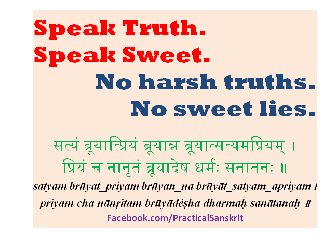

In [43]:
img = cv2.imread('../input/Q5.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img = img[20:img.shape[0]-20, 20:img.shape[1]-20]
plt.imshow(img);plt.axis('off');

In [44]:
colors = [[31,73,125], [255,0,0], [0,176,80], [0,0,0], [112,48,160]]
colors = np.array(colors)
print(colors)

[[ 31  73 125]
 [255   0   0]
 [  0 176  80]
 [  0   0   0]
 [112  48 160]]


In [45]:
img_masks = np.zeros((5, img.shape[0], img.shape[1]))
for ind in range(5):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j,0] == colors[ind,0] and img[i,j,1] == colors[ind,1] and img[i,j,2] == colors[ind,2]:
#                 print('yes')
                img_masks[ind,i,j] = 1

In [46]:
# img_masks[np.where(img_masks==0)]=np.nan    

def display(img1):
    fig = plt.figure(figsize=[7,7])
    ax1 = plt.subplot(121);ax1.imshow(img, cmap='gray');ax1.axis('off');
    ax2 = plt.subplot(122);ax2.imshow(img1, cmap='rainbow');ax2.axis('off');
    plt.show()

# for i in range(5):
#     display(i)

27


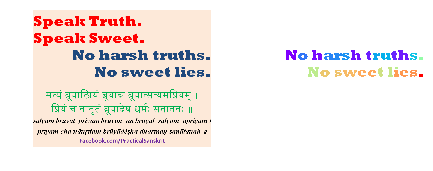

24


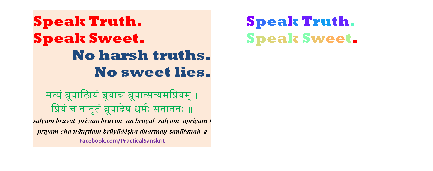

74


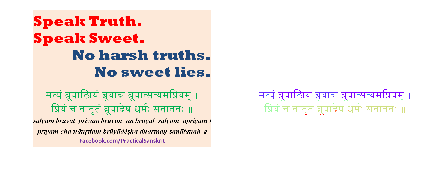

241


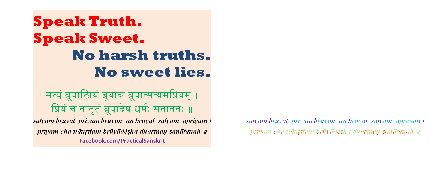

34


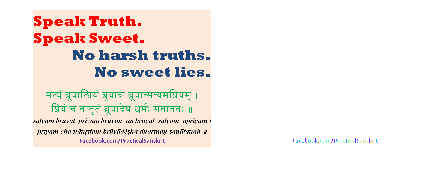

In [47]:
for i in range(5):
    mask, components = connected_components(img_masks[i])
    print(len(components))
    mask[np.where(mask==0)]=np.nan
    display(mask)

In [207]:
def unique(arr):
    w = arr.shape
    maxi = np.max(arr)
    output = np.zeros(10000)
    cnt = np.zeros(10000)
    maxi = np.max
    count = 0
    while(count<50):
        arr_new = arr
        count += 1
        for i in range(w):
            if arr_new[i] == maxi:
                cnt[maxi] += 1
        arr_new = np.delete(arr_new,maxi)
        maxi = np.max(arr_new)
    return cnt

def display(img1, mask=1):
    fig = plt.figure(figsize=[7,7])
    ax1=plt.subplot(121);ax1.imshow(img,cmap='gray');
    if mask == 1:
        ax2=plt.subplot(122);ax2.imshow(img1,cmap='rainbow');
    else:
        ax2=plt.subplot(122);ax2.imshow(img1,cmap='gray');


img = cv2.imread('../input/Q5_21.jpeg',0)
img = np.array(img)
# img = img[66:287,54:476]


print(img.shape)
img_bin = cv2.threshold(img, 100, 1, cv2.THRESH_BINARY)[1]

img_bin = img_bin[66:287,54:476]
# # plt.imshow(img_bin,cmap='gray');plt.show();

# _,mask = cv2.connectedComponents(img_bin)
mask, components = connected_components(img_bin)
# plt.imshow(img_bin,cmap='rainbow');plt.show();
# mask = mask.tolist()
# print(np.unique(mask))
# print(len(np.unique(mask)))
# print(np.unique(mask))
# print(mask[0,1])
# CC = np.zeros((65, img.shape[0], img.shape[1]))
# ans = unique(mask.flatten())
# print(len(mask.flatten))
# print(ans)
# color, indices = np.unique(mask, return_counts=True);
# idx = np.flipud(np.argsort(colorcnt))
# color = color[idx[1:6],:]
# print(color)

# for k in range(65):
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             if img[i,j]:
#                 if mask[i,j] == 
# components = list(components)
# print(components[1])
# print(np.where(mask==components[5]))
# new_img = np.zeros(img.shape)
# print(np.max(img_bin))
# print(np.shape(mask))
# color, colorcnt = np.unique(mask.reshape(-1, mask.shape[1]), axis=0, return_counts=True);
# idx = np.flipud(np.argsort(colorcnt))
# color = color[idx[1:10]]
# print(color[0])
# for i in range(img_bin.shape[0]):
#     for j in range(img_bin.shape[1]):
#         if img_bin[i,j] == 1:
# #             print('np')
#             if int(mask[i][j]) == components[5]:
# #                 CC[0,i,j] = 1
# #                 print('yes')
#                 new_img[i,j] = 1
# display(CC[0],0)
# display(new_img,0)
# plt.imshow(CC[0],cmap='gray');plt.show();
# print(CC[0])
# print(len(components))

(339, 602)


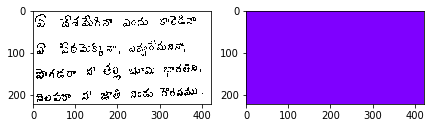

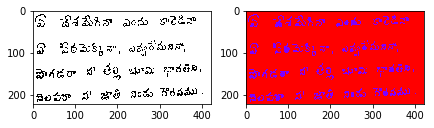

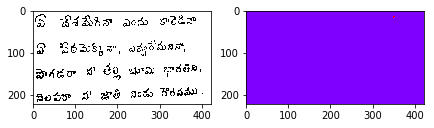

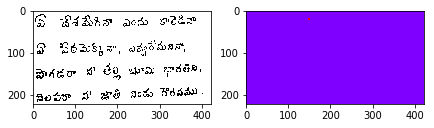

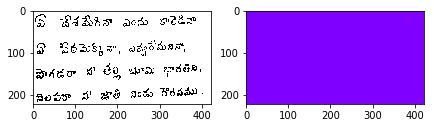

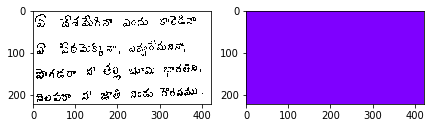

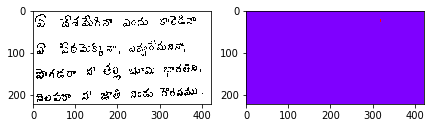

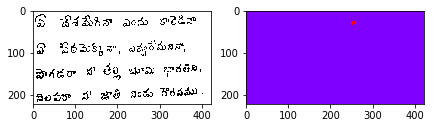

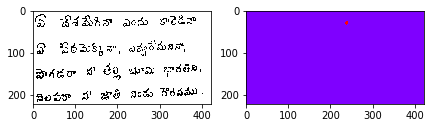

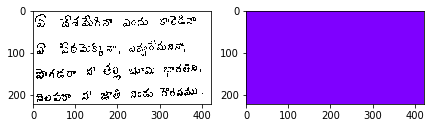

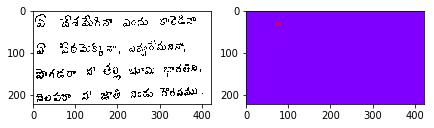

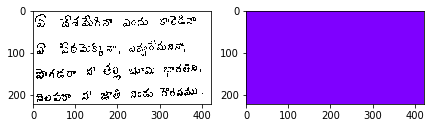

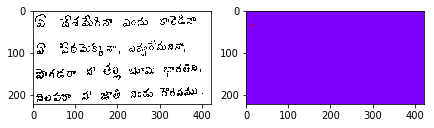

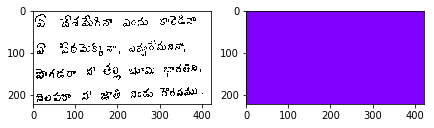

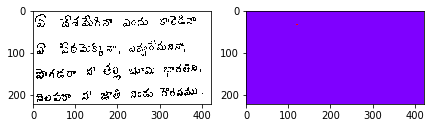

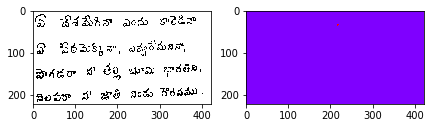

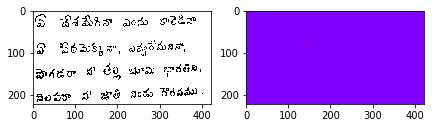

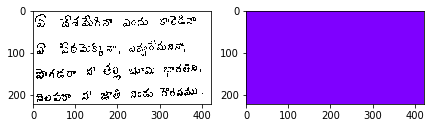

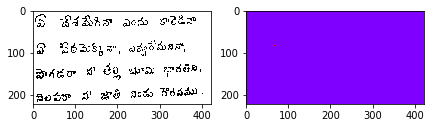

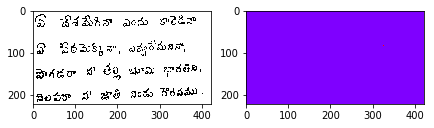

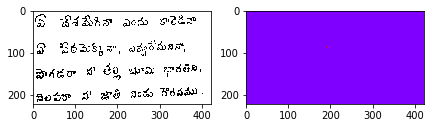

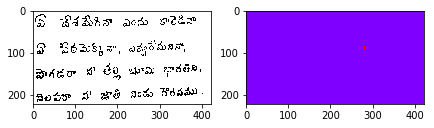

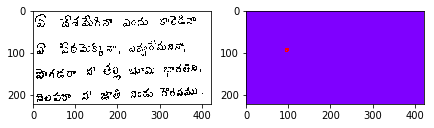

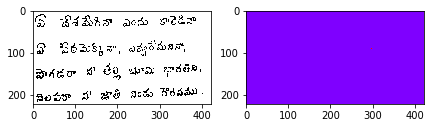

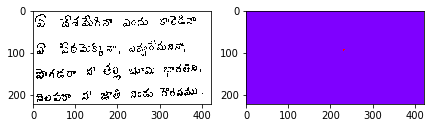

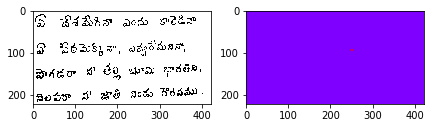

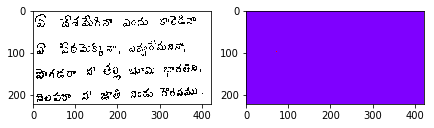

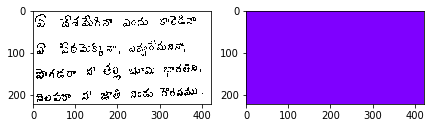

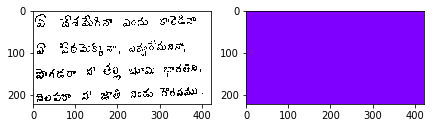

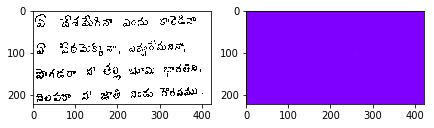

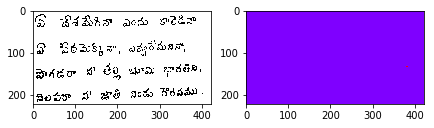

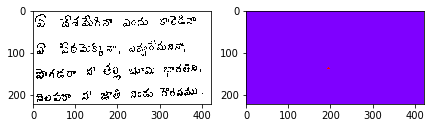

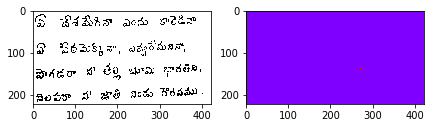

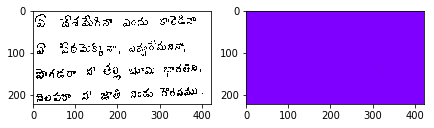

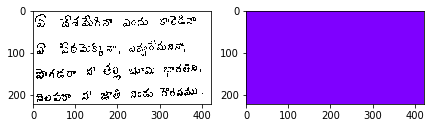

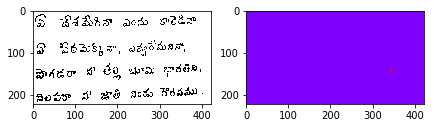

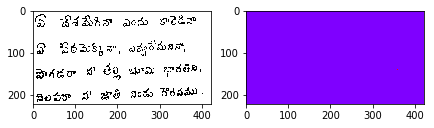

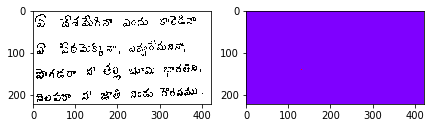

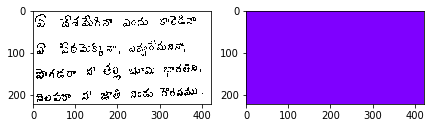

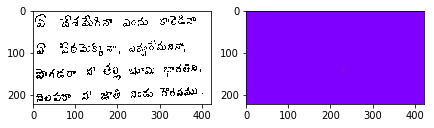

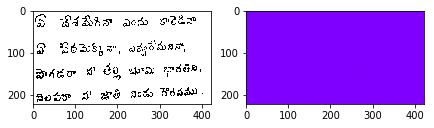

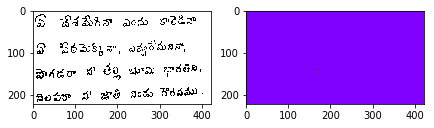

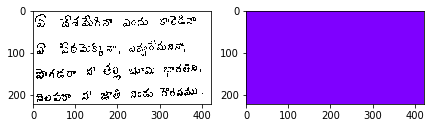

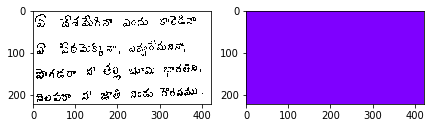

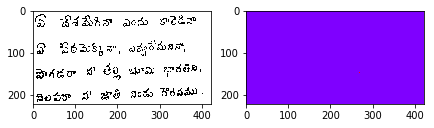

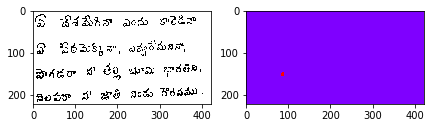

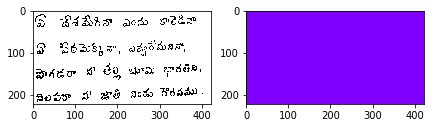

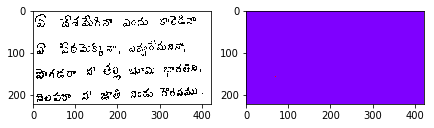

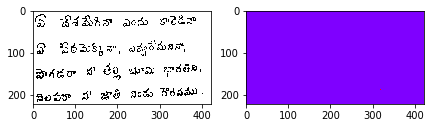

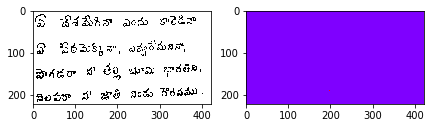

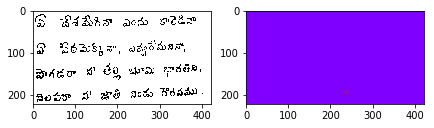

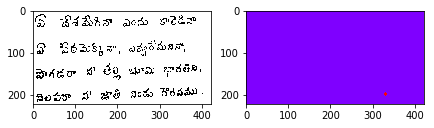

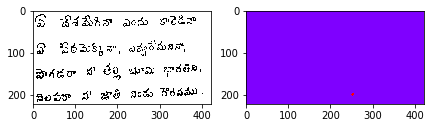

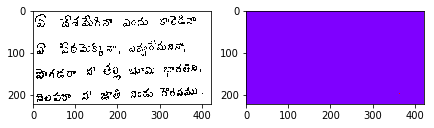

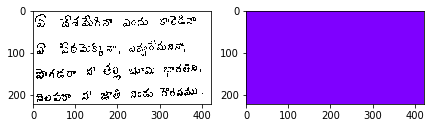

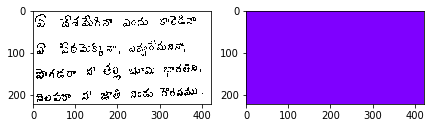

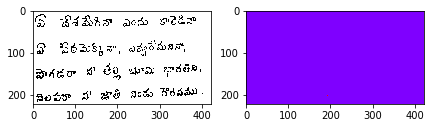

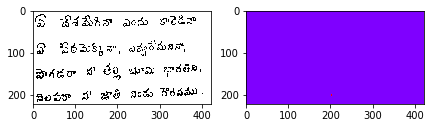

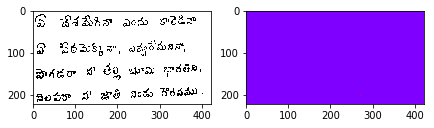

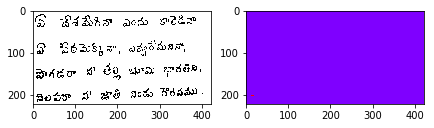

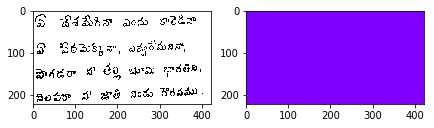

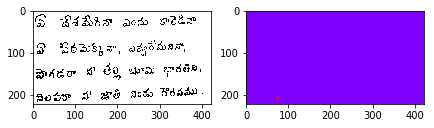

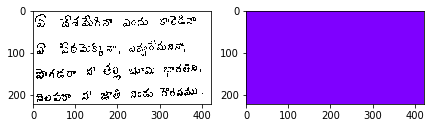

In [206]:
img = cv2.imread('../input/Q5_21.jpeg',0)
img = np.array(img)
# img = img[66:287,54:476]


# print(img.shape)
# img = cv2.threshold(img, 95, 1, cv2.THRESH_BINARY)[1]
img = (img>95).astype('uint8')
img = img[66:287,54:476]
mask, components = connected_components(img)
# _,mask = cv2.connectedComponents(img)
cnt = np.zeros(10000)
count = 0
# print(components)
# for val in components:
#     print(val)
mask1 = np.unique(mask)
x = mask1.shape[0]
(y,z) = img.shape
temp = np.zeros((x,y,z))

for i in range(x):
    for j in range(y):
        for k in range(z):
            if img[j,k] == 1:
                if mask[j,k] == mask1[i]:
                    temp[i,j,k] = 1

for i in range(x):                
    display(temp[i])
# print(np.shape(mask1))
# for val in mask1:
#     count+=1
#     cnt[int(val)] += 1
# for val in mask:
#     for val2 in val:
#         count+=1
#         cnt[int(val2)] += 1
# print(count)
# print(len(cnt==0))
# ind = np.argsort(-1*cnt)
# cnt = np.sort(cnt)
# print(ind)
# ind = ind[1:65]
# i = 0
# ind = np.flip(ind)
# cnt = cnt[1:65]
# while(i!=65):
#     print(ind[i])
#     i+=1
# count = 0
# for x in cnt
#     if x != 0:
#         count+=1
# print(count)
# for k in range(65):
#     new_img = np.zeros(img.shape)
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             if img[i,j] == 1:
#                 if mask[i,j] == ind[k]:
# #                     print('yes')
#                     new_img[i,j] = 1
#     display(new_img)
for k in range(65):
    connect_mask = connected_components(new_img[k])
    
        



(339, 602)


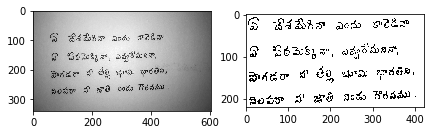

In [199]:
img = cv2.imread('../input/Q5_21.jpeg',0)
img = np.array(img)
# img = img[66:287,54:476]


print(img.shape)
img_bin = cv2.threshold(img, 95, 1, cv2.THRESH_BINARY)[1]

img_bin = img_bin[66:287,54:476]
display(img_bin,0)

In [156]:
# while(cnt[i]!=0):
#     print(cnt[i])
#     i+=1
# print(cnt.shape)

(64,)
